In [ ]:
!pip install openai

In [ ]:
import pandas as pd
import openai
import threading
import queue
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
api_key = ''
openai.api_key = api_key

In [ ]:
def get_sentiment(text, stock_name, timeout_seconds):
    prompt = f""" Classify the sentiment of the news headline related to company given
    inside text delimited by triple backticks,
    News Headline: ```{text}```
    Company: ```{stock_name}```
    """
    result_queue = queue.Queue()

    def worker():
        try:
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                {'role':'system', 'content':
                 """You are an excellent news analyser.
                 If the company is Facebook META then extra Information: Metaverse is a platform developed by facebook META, Instagram is now under META.
                 Instruction:
                 Step 1: Check if the news headline is relevant to the company or its business.
                 Step 2: If not relevant then output 0; if it is relevant then do step 3.
                 Step 3: Do sentiment analysis of news and classify it:
                 1 if positive sentiment news about the company stock for the investor,
                 -1 if negative sentiment news about the company stock for the investor,
                 0 if neutral sentiment news about the company stock for the investor.

                 Output: It should be only 0,1, or -1
                """},
                {'role':'user', 'content': prompt}],
                temperature=0,
                max_tokens=200
            )
            sentiment = response.choices[0]["message"]["content"]
            print(f"Headline: {text} | Sentiment: {sentiment}")
            result_queue.put(sentiment)
        except Exception as e:
            print("Error in get_choice_text_from_prompt:", str(e))
            result_queue.put(None)

    thread = threading.Thread(target=worker)
    thread.start()
    thread.join(timeout_seconds)

    if thread.is_alive():
        print("Timeout reached. Returning 0.")
        return 0
    else:
        return result_queue.get()

In [ ]:
def get_relevent_news(text, stock_name, timeout_seconds):
    prompt = f""" From the perspective of an investor who is long on stocks of the company
    classify if the news headline given
    inside text delimited by triple backticks is relevent to the company or its business
    News Headline: ```{text}```
    Company: ```{stock_name}```
    """
    result_queue = queue.Queue()

    def worker():
        try:
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                {'role':'system', 'content':
                 """You are an excellent news analyser who analyse news from the
                 perspective of an investor who is long on stocks of the company
                 Instruction:
                 Step 1: Check if the news headline is relevant to the company or its business.
                 Step 2: If not relevant then output 0; if it is relevant then output 1.
                 Output: It should be only 0 or 1
                """},
                {'role':'user', 'content': prompt}],
                temperature=0,
                max_tokens=200
            )
            sentiment = response.choices[0]["message"]["content"]
            print(f"Headline: {text} | Sentiment: {sentiment}")
            result_queue.put(sentiment)
        except Exception as e:
            print("Error in get_choice_text_from_prompt:", str(e))
            result_queue.put(None)

    thread = threading.Thread(target=worker)
    thread.start()
    thread.join(timeout_seconds)

    if thread.is_alive():
        print("Timeout reached. Returning 0.")
        return 0
    else:
        return result_queue.get()

In [ ]:
meta_file_path = '/content/FacebookMETA_JUL22-JUN23.xlsx'
meta_news = pd.read_excel(meta_file_path)
meta_news.drop_duplicates(subset='Headline', inplace=True)
meta_news.head()

,Date,Headline
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...
1,2022-07-01 19:11:23+00:00,Love Letter: Our Brilliant $100 Bet
2,2022-07-01 16:11:53+00:00,A Lentil Soup With Its Heart in Armenia
3,2022-07-01 17:00:04+00:00,Epic Tacos
4,2022-07-01 15:17:42+00:00,The Greatest Grilled Corn Is Glazed


In [ ]:
meta_relevent_news = meta_news.apply(lambda row: get_relevent_news(row['Headline'], """Facebook META""",10), axis=1)

Headline: Mark Zuckerberg Prepares Meta Employees for a Tougher 2022 | Sentiment: 1
Headline: Love Letter: Our Brilliant $100 Bet | Sentiment: 0
Headline: A Lentil Soup With Its Heart in Armenia | Sentiment: 0
Headline: Epic Tacos | Sentiment: 0
Headline: The Greatest Grilled Corn Is Glazed | Sentiment: 0
Headline: America’s Post-Roe Chaos Is Here | Sentiment: 0
Headline: From a Chef’s Burnout, a Singular Los Angeles Restaurant Emerges | Sentiment: 0
Headline: Stop Asking Those Closest to Tragedy to Do the Heaviest Lifting | Sentiment: 0
Headline: Vladimir Zelenko, 48, Dies; Promoted an Unfounded Covid Treatment | Sentiment: 0
Headline: The Supreme Court Sabotages Efforts to Protect Public Health and Safety | Sentiment: 0
Headline: At Least 7 Die in Glacier Collapse in Italy’s Dolomites | Sentiment: 0
Headline: Man Dies After Truck Propelled by Jet Engines Crashes at Michigan Air Show | Sentiment: 0
Headline: As City Falls, Ukraine’s Last Hope in Luhansk Falls With It | Sentiment: 0
He

In [ ]:
meta_relevent_news2 = meta_relevent_news

In [ ]:
meta_relevent_news3 = pd.DataFrame({'Date': meta_news['Date'], 'Headline': meta_news['Headline'], 'Sentiment': meta_relevent_news})

In [ ]:
meta_relevent_news3

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1
1,2022-07-01 19:11:23+00:00,Love Letter: Our Brilliant $100 Bet,0
2,2022-07-01 16:11:53+00:00,A Lentil Soup With Its Heart in Armenia,0
3,2022-07-01 17:00:04+00:00,Epic Tacos,0
4,2022-07-01 15:17:42+00:00,The Greatest Grilled Corn Is Glazed,0
...,...,...,...
3276,2023-06-29 14:36:41+00:00,Read the Supreme Court Decision,0
3278,2023-06-30 08:28:17+00:00,"Bracing for New Night of Unrest, Macron Urges ...",0
3279,2023-06-30 12:09:08+00:00,Why Corporate America Is Worried About Affirma...,0
3282,2023-07-01 09:01:15+00:00,A ‘Cage Match’ Between Elon Musk and Mark Zuck...,0


In [ ]:
meta_relevent_news3['Sentiment'] = meta_relevent_news3['Sentiment'].replace('', 0)
# Convert 'Sentiment' column to numeric
meta_relevent_news3['Sentiment'] = pd.to_numeric(meta_relevent_news3['Sentiment'], errors='coerce')
meta_relevent_news3 = meta_relevent_news3[meta_relevent_news3['Sentiment'] ==1]
meta_relevent_news3

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1
50,2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1
79,2022-07-09 22:14:51+00:00,Movin’ On Up,1
180,2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1
191,2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,1
...,...,...,...
3148,2023-06-30 09:22:34+00:00,Cambodian Ruler’s Facebook Account Goes Dark A...,1
3171,2023-06-01 11:31:21+00:00,Investors Exhale as Debt Limit Deal Clears a B...,1
3174,2023-06-02 11:45:54+00:00,Markets Await Clues for Fed’s Next Move in May...,1
3202,2023-06-08 18:55:26+00:00,"After a Rocky Year, Zuckerberg Lays Out Meta’s...",1


In [ ]:
meta_relevent_news3.rename(columns={'Sentiment': 'Relevent'}, inplace=True)
print(meta_relevent_news3.to_string(index=False))

NameError: ignored

In [ ]:
meta_relevent_news3['Sentiment'] = meta_relevent_news3.apply(lambda row: get_sentiment(row['Headline'], """Facebook META""",10), axis=1)
meta_relevent_news3

Headline: Mark Zuckerberg Prepares Meta Employees for a Tougher 2022 | Sentiment: 1
Headline: An Irish regulator puts Facebook data policies back in the spotlight. | Sentiment: 1
Headline: Movin’ On Up | Sentiment: 1
Headline: ‘Operating With Increased Intensity’: Zuckerberg Leads Meta Into Next Phase | Sentiment: 1
Headline: Meta reports first revenue decline and a 36 percent profit drop. | Sentiment: -1
Headline: F.T.C. Sues to Block Meta’s Virtual Reality Deal as It Confronts Big Tech | Sentiment: 1
Headline: 3 Senate Hopefuls Denounce Big Tech. They Also Have Deep Ties to It. | Sentiment: 0
Headline: Will the Biggest Publisher in the United States Get Even Bigger? | Sentiment: 0
Headline: It Was a Mistake to Let Kids Onto Social Media Sites. Here’s What to Do Now. | Sentiment: 0
Headline: Clock Running Out on Antitrust Bill Targeting Big Tech | Sentiment: 1
Headline: India Withdraws a Proposed Law on Data Protection | Sentiment: 0
Headline: Facebook and Instagram Remove Robert Kenn

<ipython-input-73-819c490a182e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_relevent_news3['Sentiment'] = meta_relevent_news3.apply(lambda row: get_sentiment(row['Headline'], """Facebook META""",10), axis=1)


,Date,Headline,Relevent,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1,1
50,2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1,1
79,2022-07-09 22:14:51+00:00,Movin’ On Up,1,1
180,2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1,1
191,2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,1,-1
...,...,...,...,...
3148,2023-06-30 09:22:34+00:00,Cambodian Ruler’s Facebook Account Goes Dark A...,1,1
3171,2023-06-01 11:31:21+00:00,Investors Exhale as Debt Limit Deal Clears a B...,1,1
3174,2023-06-02 11:45:54+00:00,Markets Await Clues for Fed’s Next Move in May...,1,0
3202,2023-06-08 18:55:26+00:00,"After a Rocky Year, Zuckerberg Lays Out Meta’s...",1,1


In [ ]:
meta_relevent_news4=meta_relevent_news3
meta_relevent_news4['Sentiment'] = meta_relevent_news4.apply(lambda row: get_sentiment(row['Headline'], """Facebook META""",10), axis=1)
meta_relevent_news4

Headline: Mark Zuckerberg Prepares Meta Employees for a Tougher 2022 | Sentiment: 1
Headline: An Irish regulator puts Facebook data policies back in the spotlight. | Sentiment: 1
Headline: Movin’ On Up | Sentiment: 0
Headline: ‘Operating With Increased Intensity’: Zuckerberg Leads Meta Into Next Phase | Sentiment: 1
Headline: Meta reports first revenue decline and a 36 percent profit drop. | Sentiment: -1
Headline: F.T.C. Sues to Block Meta’s Virtual Reality Deal as It Confronts Big Tech | Sentiment: -1
Headline: 3 Senate Hopefuls Denounce Big Tech. They Also Have Deep Ties to It. | Sentiment: 0
Headline: Will the Biggest Publisher in the United States Get Even Bigger? | Sentiment: 0
Headline: It Was a Mistake to Let Kids Onto Social Media Sites. Here’s What to Do Now. | Sentiment: 0
Headline: Clock Running Out on Antitrust Bill Targeting Big Tech | Sentiment: 0
Headline: India Withdraws a Proposed Law on Data Protection | Sentiment: 0
Headline: Facebook and Instagram Remove Robert Ken

<ipython-input-95-155670ec823c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_relevent_news4['Sentiment'] = meta_relevent_news4.apply(lambda row: get_sentiment(row['Headline'], """Facebook META""",10), axis=1)


,Date,Headline,Relevent,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1,1
50,2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1,1
79,2022-07-09 22:14:51+00:00,Movin’ On Up,1,0
180,2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1,1
191,2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,1,-1
...,...,...,...,...
3148,2023-06-30 09:22:34+00:00,Cambodian Ruler’s Facebook Account Goes Dark A...,1,1
3171,2023-06-01 11:31:21+00:00,Investors Exhale as Debt Limit Deal Clears a B...,1,0
3174,2023-06-02 11:45:54+00:00,Markets Await Clues for Fed’s Next Move in May...,1,0
3202,2023-06-08 18:55:26+00:00,"After a Rocky Year, Zuckerberg Lays Out Meta’s...",1,1


In [ ]:
meta_relevent_news4_backup = meta_relevent_news4

In [ ]:
excel_file_path = 'meta_relevent_news4.xlsx'
meta_relevent_news4.to_excel(excel_file_path, index=False)

print(f"DataFrame exported to {excel_file_path}")

DataFrame exported to meta_relevent_news4.xlsx


In [ ]:
excel_file_path = 'meta_relevant_news.xlsx'
meta_relevent_news3.to_excel(excel_file_path, index=False)

print(f"DataFrame exported to {excel_file_path}")

DataFrame exported to meta_relevant_news.xlsx


In [ ]:
meta_news_direct_sentiment = meta_news.apply(lambda row: get_sentiment(row['Headline'], """Facebook META""",10), axis=1)

Headline: Mark Zuckerberg Prepares Meta Employees for a Tougher 2022 | Sentiment: 1
Headline: Love Letter: Our Brilliant $100 Bet | Sentiment: 0
Headline: A Lentil Soup With Its Heart in Armenia | Sentiment: 0
Headline: Epic Tacos | Sentiment: 0
Headline: The Greatest Grilled Corn Is Glazed | Sentiment: 0
Headline: America’s Post-Roe Chaos Is Here | Sentiment: 0
Headline: From a Chef’s Burnout, a Singular Los Angeles Restaurant Emerges | Sentiment: 0
Headline: Stop Asking Those Closest to Tragedy to Do the Heaviest Lifting | Sentiment: 0
Headline: Vladimir Zelenko, 48, Dies; Promoted an Unfounded Covid Treatment | Sentiment: 0
Headline: The Supreme Court Sabotages Efforts to Protect Public Health and Safety | Sentiment: 0
Headline: At Least 7 Die in Glacier Collapse in Italy’s Dolomites | Sentiment: 0
Headline: Man Dies After Truck Propelled by Jet Engines Crashes at Michigan Air Show | Sentiment: 0
Headline: As City Falls, Ukraine’s Last Hope in Luhansk Falls With It | Sentiment: 0
He

In [ ]:
meta_direct_news_sentiment = pd.DataFrame({'Date': meta_news['Date'], 'Headline': meta_news['Headline'], 'Sentiment': meta_news_direct_sentiment})

In [ ]:
meta_direct_news_sentiment

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1
1,2022-07-01 19:11:23+00:00,Love Letter: Our Brilliant $100 Bet,0
2,2022-07-01 16:11:53+00:00,A Lentil Soup With Its Heart in Armenia,0
3,2022-07-01 17:00:04+00:00,Epic Tacos,0
4,2022-07-01 15:17:42+00:00,The Greatest Grilled Corn Is Glazed,0
...,...,...,...
3276,2023-06-29 14:36:41+00:00,Read the Supreme Court Decision,0
3278,2023-06-30 08:28:17+00:00,"Bracing for New Night of Unrest, Macron Urges ...",0
3279,2023-06-30 12:09:08+00:00,Why Corporate America Is Worried About Affirma...,0
3282,2023-07-01 09:01:15+00:00,A ‘Cage Match’ Between Elon Musk and Mark Zuck...,0


In [ ]:
meta_direct_news_sentiment['Sentiment'] = meta_direct_news_sentiment['Sentiment'].replace('', 0)
# Convert 'Sentiment' column to numeric
meta_direct_news_sentiment['Sentiment'] = pd.to_numeric(meta_direct_news_sentiment['Sentiment'], errors='coerce')
meta_direct_news_sentiment

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1.0
1,2022-07-01 19:11:23+00:00,Love Letter: Our Brilliant $100 Bet,0.0
2,2022-07-01 16:11:53+00:00,A Lentil Soup With Its Heart in Armenia,0.0
3,2022-07-01 17:00:04+00:00,Epic Tacos,0.0
4,2022-07-01 15:17:42+00:00,The Greatest Grilled Corn Is Glazed,0.0
...,...,...,...
3276,2023-06-29 14:36:41+00:00,Read the Supreme Court Decision,0.0
3278,2023-06-30 08:28:17+00:00,"Bracing for New Night of Unrest, Macron Urges ...",0.0
3279,2023-06-30 12:09:08+00:00,Why Corporate America Is Worried About Affirma...,0.0
3282,2023-07-01 09:01:15+00:00,A ‘Cage Match’ Between Elon Musk and Mark Zuck...,0.0


In [ ]:
meta_news_direct_sentiment_modified = meta_news.apply(lambda row: get_sentiment(row['Headline'], """Facebook META""",10), axis=1)
meta_direct_news_sentiment_modified = pd.DataFrame({'Date': meta_news['Date'], 'Headline': meta_news['Headline'], 'Sentiment': meta_news_direct_sentiment_modified})
meta_direct_news_sentiment_modified['Sentiment'] = meta_direct_news_sentiment_modified['Sentiment'].replace('', 0)
# Convert 'Sentiment' column to numeric
meta_direct_news_sentiment_modified['Sentiment'] = pd.to_numeric(meta_direct_news_sentiment_modified['Sentiment'], errors='coerce')
meta_direct_news_sentiment_modified

Headline: Mark Zuckerberg Prepares Meta Employees for a Tougher 2022 | Sentiment: 1
Headline: Love Letter: Our Brilliant $100 Bet | Sentiment: 0
Headline: A Lentil Soup With Its Heart in Armenia | Sentiment: 0
Headline: Epic Tacos | Sentiment: 0
Headline: The Greatest Grilled Corn Is Glazed | Sentiment: 0
Headline: America’s Post-Roe Chaos Is Here | Sentiment: 0
Headline: From a Chef’s Burnout, a Singular Los Angeles Restaurant Emerges | Sentiment: 0
Headline: Stop Asking Those Closest to Tragedy to Do the Heaviest Lifting | Sentiment: 0
Headline: Vladimir Zelenko, 48, Dies; Promoted an Unfounded Covid Treatment | Sentiment: 0
Headline: The Supreme Court Sabotages Efforts to Protect Public Health and Safety | Sentiment: 0
Headline: At Least 7 Die in Glacier Collapse in Italy’s Dolomites | Sentiment: 0
Headline: Man Dies After Truck Propelled by Jet Engines Crashes at Michigan Air Show | Sentiment: 0
Headline: As City Falls, Ukraine’s Last Hope in Luhansk Falls With It | Sentiment: 0
He

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1
1,2022-07-01 19:11:23+00:00,Love Letter: Our Brilliant $100 Bet,0
2,2022-07-01 16:11:53+00:00,A Lentil Soup With Its Heart in Armenia,0
3,2022-07-01 17:00:04+00:00,Epic Tacos,0
4,2022-07-01 15:17:42+00:00,The Greatest Grilled Corn Is Glazed,0
...,...,...,...
3276,2023-06-29 14:36:41+00:00,Read the Supreme Court Decision,0
3278,2023-06-30 08:28:17+00:00,"Bracing for New Night of Unrest, Macron Urges ...",0
3279,2023-06-30 12:09:08+00:00,Why Corporate America Is Worried About Affirma...,0
3282,2023-07-01 09:01:15+00:00,A ‘Cage Match’ Between Elon Musk and Mark Zuck...,0


In [ ]:
meta_direct_news_sentiment_modified2 = meta_direct_news_sentiment_modified[meta_direct_news_sentiment_modified['Sentiment'] != 0]
meta_direct_news_sentiment_modified2

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1
50,2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1
180,2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1
191,2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,-1
192,2022-07-27 17:50:07+00:00,F.T.C. Sues to Block Meta’s Virtual Reality De...,-1
344,2022-08-18 21:07:17+00:00,Facebook and Instagram Remove Robert Kennedy J...,-1
351,2022-08-24 22:49:51+00:00,"Facebook, Twitter and Others Remove Pro-U.S. I...",1
395,2022-09-05 17:12:59+00:00,Meta Fined $400 Million for Treatment of Child...,-1
543,2022-09-29 20:02:29+00:00,"Meta Will Freeze Most Hiring, Zuckerberg Tells...",1
766,2022-10-18 13:44:01+00:00,Meta Forced to Sell Giphy After British Antitr...,1


In [ ]:
# meta_news['sentiment'].head()
excel_file_path = 'meta_direct_news_sentiment_modified2.xlsx'
meta_direct_news_sentiment_modified2.to_excel(excel_file_path, index=False)
print(f"DataFrame exported to {excel_file_path}")
print(meta_direct_news_sentiment.to_string(index=False))

DataFrame exported to meta_direct_news_sentiment_modified2.xlsx
                     Date                                                                                                            Headline  Sentiment
2022-07-01 22:44:10+00:00                                                          Mark Zuckerberg Prepares Meta Employees for a Tougher 2022        1.0
2022-07-01 19:11:23+00:00                                                                                 Love Letter: Our Brilliant $100 Bet        0.0
2022-07-01 16:11:53+00:00                                                                             A Lentil Soup With Its Heart in Armenia        0.0
2022-07-01 17:00:04+00:00                                                                                                          Epic Tacos        0.0
2022-07-01 15:17:42+00:00                                                                                 The Greatest Grilled Corn Is Glazed        0.0
2022-07-01 09:00:1

In [ ]:
# meta_news['sentiment'].head()
excel_file_path = 'meta_news_sentiment_direct.xlsx'
meta_direct_news_sentiment.to_excel(excel_file_path, index=False)
print(f"DataFrame exported to {excel_file_path}")
print(meta_direct_news_sentiment.to_string(index=False))

DataFrame exported to meta_news_sentiment_direct.xlsx
                     Date                                                                                                            Headline  Sentiment
2022-07-01 22:44:10+00:00                                                          Mark Zuckerberg Prepares Meta Employees for a Tougher 2022        1.0
2022-07-01 19:11:23+00:00                                                                                 Love Letter: Our Brilliant $100 Bet        0.0
2022-07-01 16:11:53+00:00                                                                             A Lentil Soup With Its Heart in Armenia        0.0
2022-07-01 17:00:04+00:00                                                                                                          Epic Tacos        0.0
2022-07-01 15:17:42+00:00                                                                                 The Greatest Grilled Corn Is Glazed        0.0
2022-07-01 09:00:13+00:00   

In [ ]:
meta_direct_news_sentiment2 = meta_direct_news_sentiment[meta_direct_news_sentiment['Sentiment'] ==-1]
meta_direct_news_sentiment2

,Date,Headline,Sentiment
191,2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,-1.0
1237,2022-11-17 13:32:18+00:00,Investor Losses From FTX’s Implosion Are Growing,-1.0


In [ ]:
meta_direct_news_sentiment3 = meta_direct_news_sentiment[meta_direct_news_sentiment['Sentiment'] == 1]
meta_direct_news_sentiment3

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1.0
50,2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1.0
79,2022-07-09 22:14:51+00:00,Movin’ On Up,1.0
180,2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1.0
192,2022-07-27 17:50:07+00:00,F.T.C. Sues to Block Meta’s Virtual Reality De...,1.0
...,...,...,...
3149,2023-06-30 16:14:54+00:00,"Goodbye, Old Friend",1.0
3171,2023-06-01 11:31:21+00:00,Investors Exhale as Debt Limit Deal Clears a B...,1.0
3202,2023-06-08 18:55:26+00:00,"After a Rocky Year, Zuckerberg Lays Out Meta’s...",1.0
3204,2023-06-08 02:00:08+00:00,One Who’s Bound to Succeed,1.0


In [ ]:
meta_direct_news_sentiment4 = meta_direct_news_sentiment[meta_direct_news_sentiment['Sentiment'] != 0]
meta_direct_news_sentiment4

,Date,Headline,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1.0
50,2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1.0
79,2022-07-09 22:14:51+00:00,Movin’ On Up,1.0
180,2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1.0
191,2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,-1.0
...,...,...,...
3149,2023-06-30 16:14:54+00:00,"Goodbye, Old Friend",1.0
3171,2023-06-01 11:31:21+00:00,Investors Exhale as Debt Limit Deal Clears a B...,1.0
3202,2023-06-08 18:55:26+00:00,"After a Rocky Year, Zuckerberg Lays Out Meta’s...",1.0
3204,2023-06-08 02:00:08+00:00,One Who’s Bound to Succeed,1.0


In [ ]:
excel_file_path = 'meta_news_sentiment_direct_non0.xlsx'
meta_direct_news_sentiment4.to_excel(excel_file_path, index=False)
print(f"DataFrame exported to {excel_file_path}")
print(meta_direct_news_sentiment.to_string(index=False))

DataFrame exported to meta_news_sentiment_direct_non0.xlsx
                     Date                                                                                                            Headline  Sentiment
2022-07-01 22:44:10+00:00                                                          Mark Zuckerberg Prepares Meta Employees for a Tougher 2022        1.0
2022-07-01 19:11:23+00:00                                                                                 Love Letter: Our Brilliant $100 Bet        0.0
2022-07-01 16:11:53+00:00                                                                             A Lentil Soup With Its Heart in Armenia        0.0
2022-07-01 17:00:04+00:00                                                                                                          Epic Tacos        0.0
2022-07-01 15:17:42+00:00                                                                                 The Greatest Grilled Corn Is Glazed        0.0
2022-07-01 09:00:13+00:

In [ ]:
meta_relevent_news4['Sentiment'] = meta_relevent_news4['Sentiment'].replace('', 0)
meta_relevent_news4['Sentiment'] = pd.to_numeric(meta_relevent_news4['Sentiment'], errors='coerce')
meta_relevent_news4

<ipython-input-102-e2705d49cf40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_relevent_news4['Sentiment'] = meta_relevent_news4['Sentiment'].replace('', 0)
<ipython-input-102-e2705d49cf40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_relevent_news4['Sentiment'] = pd.to_numeric(meta_relevent_news4['Sentiment'], errors='coerce')


,Date,Headline,Relevent,Sentiment
0,2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1,1
50,2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1,1
79,2022-07-09 22:14:51+00:00,Movin’ On Up,1,0
180,2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1,1
191,2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,1,-1
...,...,...,...,...
3148,2023-06-30 09:22:34+00:00,Cambodian Ruler’s Facebook Account Goes Dark A...,1,1
3171,2023-06-01 11:31:21+00:00,Investors Exhale as Debt Limit Deal Clears a B...,1,0
3174,2023-06-02 11:45:54+00:00,Markets Await Clues for Fed’s Next Move in May...,1,0
3202,2023-06-08 18:55:26+00:00,"After a Rocky Year, Zuckerberg Lays Out Meta’s...",1,1


In [ ]:
# Assuming meta_relevent_news4 is your DataFrame and 'Date' is the column with the datetime information
meta_relevent_news4['Date'] = pd.to_datetime(meta_relevent_news4['Date'])
meta_relevent_news4.set_index('Date', inplace=True)

# Now you can resample using a datetime index
meta_relevent_news_resampled = meta_relevent_news4['Sentiment'].resample('D').sum()
print(meta_relevent_news_resampled)

Date
2022-07-01 00:00:00+00:00    1
2022-07-02 00:00:00+00:00    0
2022-07-03 00:00:00+00:00    0
2022-07-04 00:00:00+00:00    0
2022-07-05 00:00:00+00:00    0
                            ..
2023-06-26 00:00:00+00:00    0
2023-06-27 00:00:00+00:00    0
2023-06-28 00:00:00+00:00    0
2023-06-29 00:00:00+00:00    0
2023-06-30 00:00:00+00:00    1
Freq: D, Name: Sentiment, Length: 365, dtype: int64


<ipython-input-105-14f215151b9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_relevent_news4['Date'] = pd.to_datetime(meta_relevent_news4['Date'])


In [ ]:
meta_relevent_news_resampled.index = meta_relevent_news_resampled.index.date

In [ ]:
meta_relevent_news_resampled

2022-07-01    1
2022-07-02    0
2022-07-03    0
2022-07-04    0
2022-07-05    0
             ..
2023-06-26    0
2023-06-27    0
2023-06-28    0
2023-06-29    0
2023-06-30    1
Name: Sentiment, Length: 365, dtype: int64

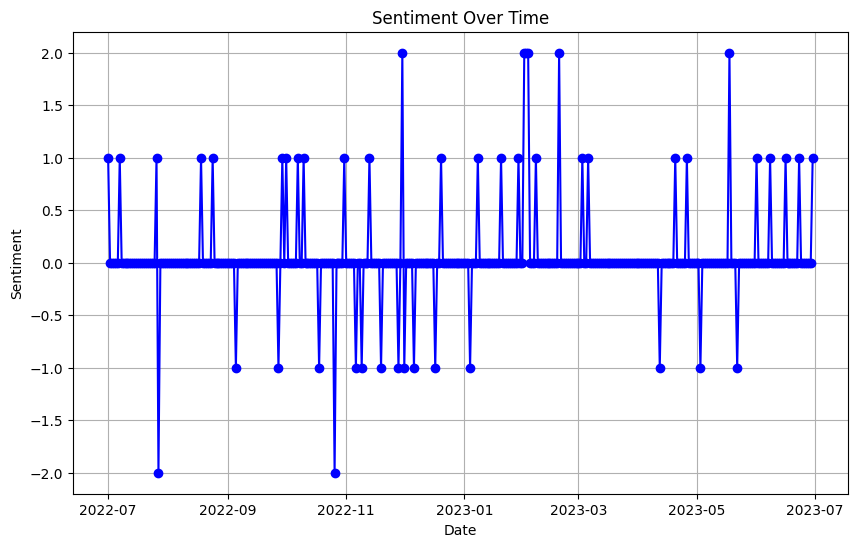

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(meta_relevent_news_resampled.index, meta_relevent_news_resampled.values, marker='o', linestyle='-', color='b')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()

In [ ]:
meta_file_path2 = '/content/FacebookMETA_stockvalues_data (1).csv'
meta_price = pd.read_csv(meta_file_path2)  # Use pd.read_csv for CSV files

# Convert the 'Date' column to datetime if it's not already
meta_price['Date'] = pd.to_datetime(meta_price['Date'])

# Sort the DataFrame based on the 'Date' column
meta_price = meta_price.sort_values(by='Date')

# Calculate returns
meta_price['Return'] = meta_price['Close'].pct_change()
meta_return=meta_price
# Set 'Date' column as index and 'Return' column as values
meta_price.set_index('Date', inplace=True)
fb_meta_returns = meta_price['Return']

print(fb_meta_returns.head())
print(meta_price.head())

Date
2022-07-01 00:00:00-04:00         NaN
2022-07-05 00:00:00-04:00    0.050990
2022-07-06 00:00:00-04:00    0.009394
2022-07-07 00:00:00-04:00    0.014255
2022-07-08 00:00:00-04:00   -0.007608
Name: Return, dtype: float64
                                 Open        High         Low       Close  \
Date                                                                        
2022-07-01 00:00:00-04:00  160.309998  160.619995  155.000000  160.029999   
2022-07-05 00:00:00-04:00  158.139999  168.250000  157.020004  168.190002   
2022-07-06 00:00:00-04:00  168.199997  171.589996  165.460007  169.770004   
2022-07-07 00:00:00-04:00  169.449997  172.720001  167.779999  172.190002   
2022-07-08 00:00:00-04:00  169.979996  172.399994  168.149994  170.880005   

                             Volume  Dividends  Stock Splits    Return  
Date                                                                    
2022-07-01 00:00:00-04:00  31423900        0.0           0.0       NaN  
2022-07-05 00:00:

In [ ]:
fb_meta_returns.index = pd.to_datetime(fb_meta_returns.index, utc=True).tz_convert('UTC')
print(fb_meta_returns)

Date
2022-07-01 04:00:00+00:00         NaN
2022-07-05 04:00:00+00:00    0.050990
2022-07-06 04:00:00+00:00    0.009394
2022-07-07 04:00:00+00:00    0.014255
2022-07-08 04:00:00+00:00   -0.007608
                               ...   
2023-06-23 04:00:00+00:00    0.013514
2023-06-26 04:00:00+00:00   -0.035535
2023-06-27 04:00:00+00:00    0.030811
2023-06-28 04:00:00+00:00   -0.006131
2023-06-29 04:00:00+00:00   -0.013180
Name: Return, Length: 250, dtype: float64


In [ ]:
fb_meta_returns.index = fb_meta_returns.index.date
fb_meta_returns

2022-07-01         NaN
2022-07-05    0.050990
2022-07-06    0.009394
2022-07-07    0.014255
2022-07-08   -0.007608
                ...   
2023-06-23    0.013514
2023-06-26   -0.035535
2023-06-27    0.030811
2023-06-28   -0.006131
2023-06-29   -0.013180
Name: Return, Length: 250, dtype: float64

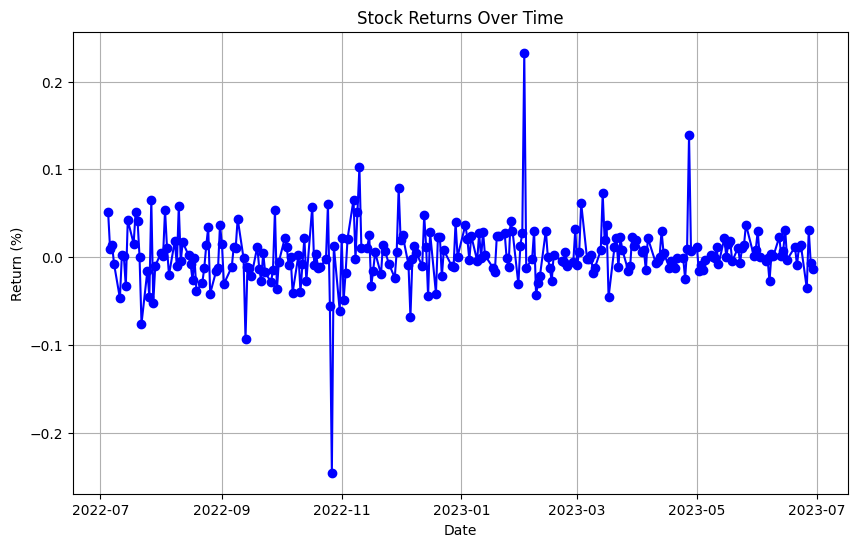

In [ ]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(fb_meta_returns.index, fb_meta_returns.values, marker='o', linestyle='-', color='b')
plt.title('Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

In [ ]:
# Inner merge on the index (date)
merged_data_meta1 = pd.merge(fb_meta_returns, meta_relevent_news_resampled, left_index=True, right_index=True, how='inner')
print(merged_data_meta1)

              Return  Sentiment
2022-07-01       NaN          1
2022-07-05  0.050990          0
2022-07-06  0.009394          0
2022-07-07  0.014255          1
2022-07-08 -0.007608          0
...              ...        ...
2023-06-23  0.013514          1
2023-06-26 -0.035535          0
2023-06-27  0.030811          0
2023-06-28 -0.006131          0
2023-06-29 -0.013180          0

[250 rows x 2 columns]


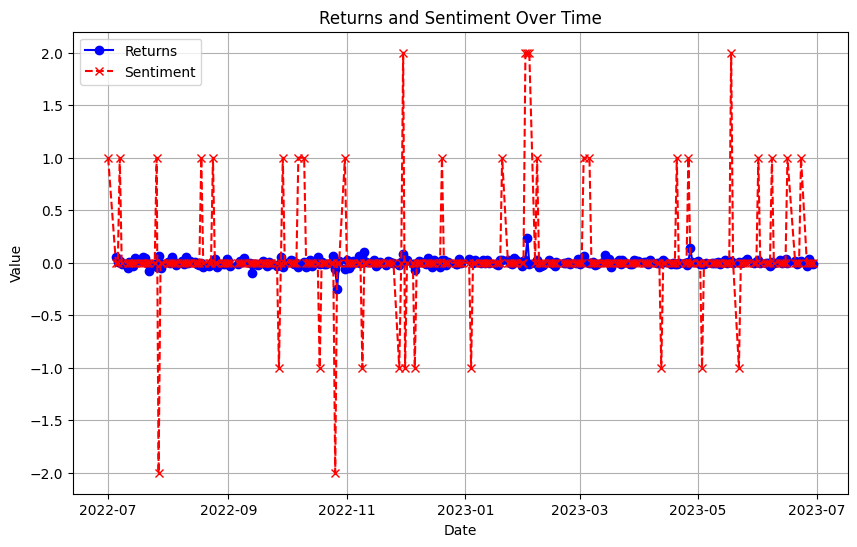

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Returns
plt.plot(merged_data_meta1.index, merged_data_meta1['Return'], marker='o', linestyle='-', color='b', label='Returns')

# Plotting Sentiment Scores
plt.plot(merged_data_meta1.index, merged_data_meta1['Sentiment'], marker='x', linestyle='--', color='r', label='Sentiment')

plt.title('Returns and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

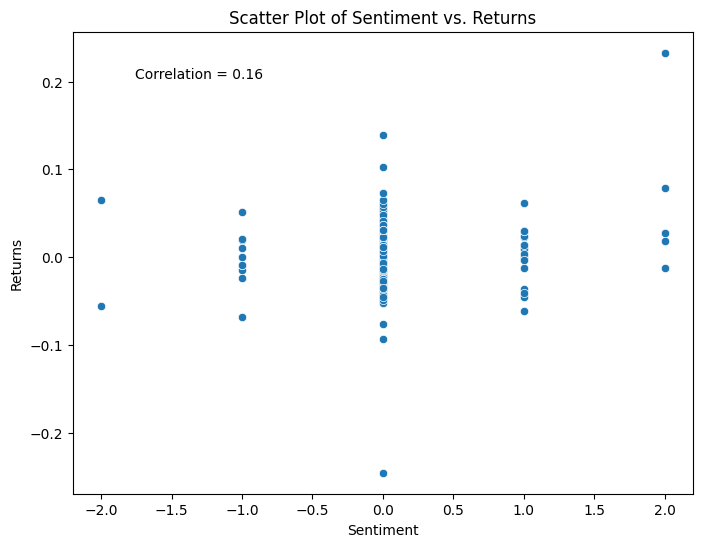

In [ ]:
import seaborn as sns

# Calculate the Pearson correlation coefficient
correlation = merged_data_meta1['Return'].corr(merged_data_meta1['Sentiment'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data_meta1, x='Sentiment', y='Return')
plt.title('Scatter Plot of Sentiment vs. Returns')
plt.xlabel('Sentiment')
plt.ylabel('Returns')

# Display the Pearson correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation = {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

Spearman's Rank Correlation Coefficient: nan
P-value: nan


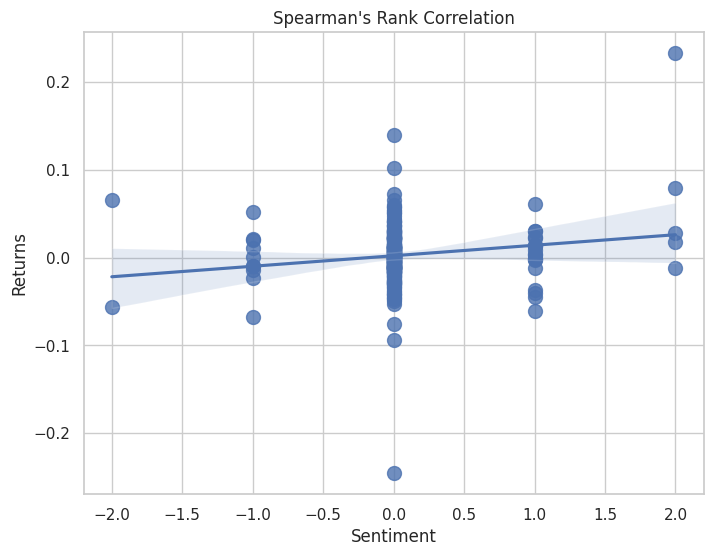

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Calculate Spearman's rank correlation
correlation_coefficient, p_value = spearmanr(merged_data_meta1['Return'],merged_data_meta1['Sentiment'])

print(f"Spearman's Rank Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Create a scatter plot with regression line
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x='Sentiment', y='Return', data=merged_data_meta1, scatter_kws={'s': 100})
plt.title("Spearman's Rank Correlation")
plt.xlabel("Sentiment")
plt.ylabel("Returns")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 11 Aug 2023   Prob (F-statistic):                nan
Time:                        09:34:41   Log-Likelihood:                    nan
No. Observations:                 250   AIC:                               nan
Df Residuals:                     248   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

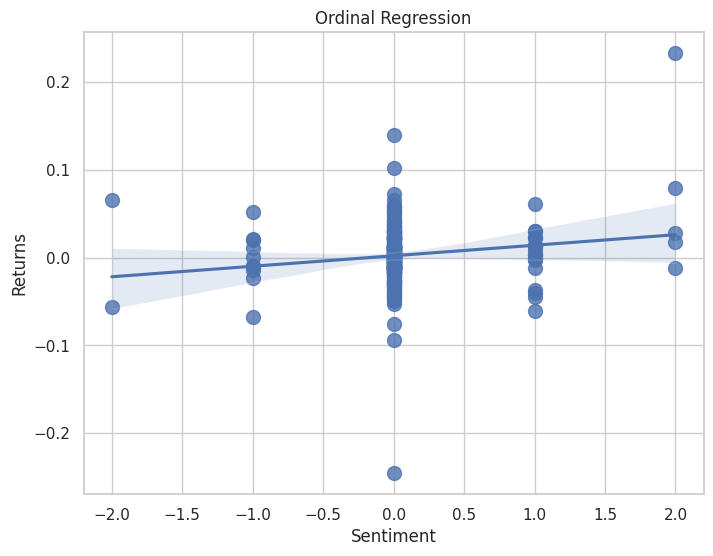

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# Fit ordinal logistic regression model
model = sm.OLS(merged_data_meta1['Return'], sm.add_constant(merged_data_meta1['Sentiment']))
results = model.fit()

print(results.summary())

# Create a scatter plot with the regression line
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x='Sentiment', y='Return', data=merged_data_meta1, scatter_kws={'s': 100})
plt.title("Ordinal Regression")
plt.xlabel("Sentiment")
plt.ylabel("Returns")
plt.show()


Kruskal-Wallis Test Statistic: nan
P-value: nan


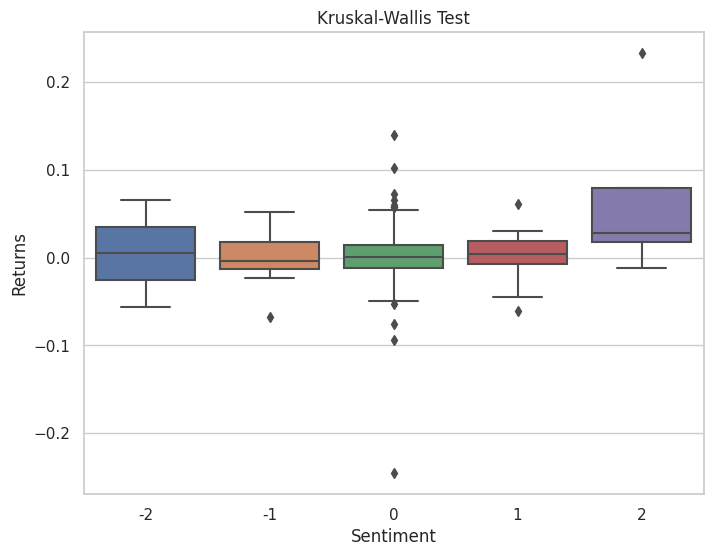

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(
    merged_data_meta1.loc[merged_data_meta1['Sentiment'] == -2, 'Return'],
    merged_data_meta1.loc[merged_data_meta1['Sentiment'] == -1, 'Return'],
    merged_data_meta1.loc[merged_data_meta1['Sentiment'] == 0, 'Return'],
    merged_data_meta1.loc[merged_data_meta1['Sentiment'] == 1, 'Return'],
    merged_data_meta1.loc[merged_data_meta1['Sentiment'] == 2, 'Return']
)

print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Create a box plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Return', data=merged_data_meta1)
plt.title("Kruskal-Wallis Test")
plt.xlabel("Sentiment")
plt.ylabel("Returns")
plt.show()

Spearman's Rank Correlation Coefficient: nan
P-value: nan


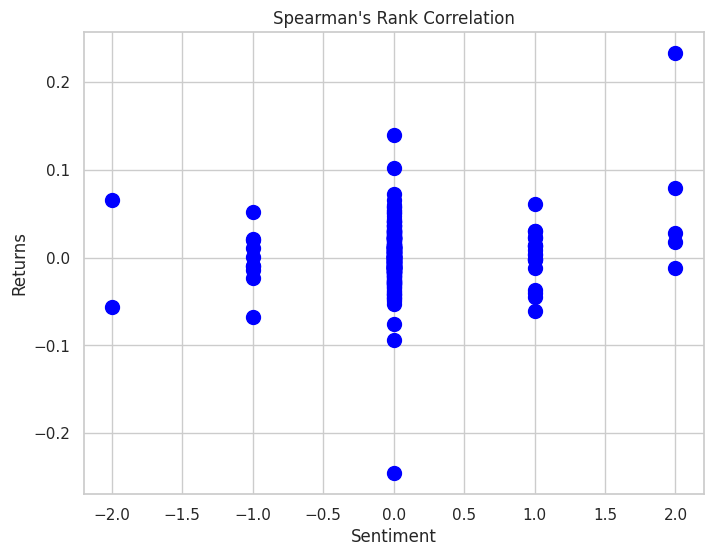

In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


# Calculate Spearman's rank correlation
correlation_coefficient, p_value = spearmanr(merged_data_meta1['Sentiment'], merged_data_meta1['Return'])

print(f"Spearman's Rank Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Create a scatter plot with sentiment on the x-axis and returns on the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(merged_data_meta1['Sentiment'], merged_data_meta1['Return'], s=100, color='blue')
plt.title("Spearman's Rank Correlation")
plt.xlabel("Sentiment")
plt.ylabel("Returns")
plt.grid(True)
plt.show()


In [ ]:
import threading
import queue

def get_sentiment_new(text, stock_name, timeout_seconds):
    prompt = f""" Score the sentiment of the news headline related to company given
    inside text delimited by triple backticks,
    News Headline: ```{text}```
    Company: ```{stock_name}```
    """
    result_queue = queue.Queue()

    def worker():
        try:
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                {'role':'system', 'content':
                 """You are an excellent news analyser.
                 If the company is Facebook META then extra Information: Metaverse is a platform developed by facebook META
                 Instruction:
                 Step 1: Check if the news headline is relevant to the company or its business.
                 Step 2: If not relevant then output 0; if it is relevant then do step 3.
                 Step 3: Do sentiment analysis of news and score it between
                 -10 (if very negative sentiment news about the company stock for the investor) and
                 10 (if very positive sentiment news about the company stock for the investor) based on factors like:
                 Tone of Language:
                Analyze the tone of the language used in the news headline.
                Positive words and phrases (e.g., "strong performance," "record profits") are likely to contribute to a positive sentiment score,
                while negative words and phrases (e.g., "losses," "crisis") may contribute to a negative sentiment score.

                Magnitude of Impact:
                Consider the magnitude of the impact discussed in the news.
                Larger positive or negative events are likely to have a greater impact on sentiment.
                For example, a major product launch or a significant legal issue can have a higher influence than a minor development.

                Financial Metrics:
                Look for mentions of key financial metrics, such as revenue, earnings, profit margins, and growth rates.
                Positive news related to strong financial performance can contribute to a positive sentiment score.

                Strategic Initiatives:
                Assess news related to strategic initiatives, partnerships, acquisitions, or expansions.
                Positive developments that indicate a company's growth or competitive advantage may increase investor optimism.

                Management Statements:
                Consider statements made by company executives or management in the news.
                Positive statements about the company's outlook or future prospects can influence sentiment.

                Industry Trends:
                Evaluate how the news aligns with broader industry trends.
                Positive news that indicates the company is well-positioned within a growing industry may contribute to a higher sentiment score.

                Market Reaction:
                Analyze any information about how the stock market is reacting to the news.
                Positive stock price movements in response to the news can validate a positive sentiment score.

                Competitor Comparison:
                Compare the news with similar news about competitors in the industry.
                If the company's news is more positive or negative in comparison, adjust the sentiment score accordingly.

                Consumer Sentiment:
                Consider any impact on consumer sentiment or public perception.
                Positive news about product launches or customer satisfaction can contribute to a positive sentiment score.
                Output: It should be only between -10 and 10 with 2 decimal point.
                """},
                {'role':'user', 'content': prompt}],
                temperature=0,
                max_tokens=200
            )
            sentiment = response.choices[0]["message"]["content"]
            print(f"Headline: {text} | Sentiment: {sentiment}")
            result_queue.put(sentiment)
        except Exception as e:
            print("Error in get_choice_text_from_prompt:", str(e))
            result_queue.put(0)

    thread = threading.Thread(target=worker)
    thread.start()
    thread.join(timeout_seconds)

    if thread.is_alive():
        print("Timeout reached. Returning 0.")
        return 0
    else:
        return result_queue.get()

In [ ]:
meta_relevent_news4_new=meta_relevent_news3
meta_relevent_news4_new

,Headline,Relevent,Sentiment
Date,,,
2022-07-01 22:44:10+00:00,Mark Zuckerberg Prepares Meta Employees for a ...,1,8.50
2022-07-07 14:52:43+00:00,An Irish regulator puts Facebook data policies...,1,0
2022-07-09 22:14:51+00:00,Movin’ On Up,1,0
2022-07-26 14:55:33+00:00,‘Operating With Increased Intensity’: Zuckerbe...,1,8.50
2022-07-27 20:17:54+00:00,Meta reports first revenue decline and a 36 pe...,1,-5.00
...,...,...,...
2023-06-30 09:22:34+00:00,Cambodian Ruler’s Facebook Account Goes Dark A...,1,8.50
2023-06-01 11:31:21+00:00,Investors Exhale as Debt Limit Deal Clears a B...,1,0
2023-06-02 11:45:54+00:00,Markets Await Clues for Fed’s Next Move in May...,1,0


In [ ]:
meta_relevent_news4_new['Sentiment'] = meta_relevent_news4_new.apply(lambda row: get_sentiment_new(row['Headline'], """Facebook META""",10), axis=1)
meta_relevent_news4_new

Error in get_choice_text_from_prompt: Incorrect API key provided: sk-9NWr9***************************************CaVh. You can find your API key at https://platform.openai.com/account/api-keys.
Error in get_choice_text_from_prompt: Incorrect API key provided: sk-9NWr9***************************************CaVh. You can find your API key at https://platform.openai.com/account/api-keys.
Error in get_choice_text_from_prompt: Incorrect API key provided: sk-9NWr9***************************************CaVh. You can find your API key at https://platform.openai.com/account/api-keys.
Error in get_choice_text_from_prompt: Incorrect API key provided: sk-9NWr9***************************************CaVh. You can find your API key at https://platform.openai.com/account/api-keys.
Error in get_choice_text_from_prompt: Incorrect API key provided: sk-9NWr9***************************************CaVh. You can find your API key at https://platform.openai.com/account/api-keys.
Error in get_choice_text_from_

KeyboardInterrupt: ignored

Error in get_choice_text_from_prompt: Incorrect API key provided: sk-9NWr9***************************************CaVh. You can find your API key at https://platform.openai.com/account/api-keys.


In [ ]:
microsoft_file_path = '/content/Microsoft_JUL22-JUN23.xlsx'
microsoft_news = pd.read_excel(microsoft_file_path)
microsoft_news.drop_duplicates(subset='Headline', inplace=True)
microsoft_news.head()

,Date,Headline
0,2022-07-01 19:43:03+00:00,"Father of Technoblade, YouTube Minecraft Star,..."
1,2022-07-03 15:00:20+00:00,"America the Imperfect, on the Fourth of July"
3,2022-07-04 15:30:11+00:00,What I Learned While Talking to Strangers
5,2022-07-06 23:03:13+00:00,Steve Ballmer Is Building a ‘Moneyball’ for Go...
6,2022-07-06 19:18:00+00:00,Steam Deck Review: A Game Console for the Quin...


In [ ]:
microsoft_news['sentiment'] = microsoft_news.apply(lambda row: get_choice_text_from_prompt_with_timeout(row['Headline'], """Microsoft""",10), axis=1)

Headline: Father of Technoblade, YouTube Minecraft Star, Says His Son Has Died | Sentiment: -1
Headline: America the Imperfect, on the Fourth of July | Sentiment: 0
Headline: What I Learned While Talking to Strangers | Sentiment: 0
Headline: Steve Ballmer Is Building a ‘Moneyball’ for Government | Sentiment: 1
Headline: Steam Deck Review: A Game Console for the Quintessential Gamer | Sentiment: 1
Headline: A Darkened Outlook for Britain | Sentiment: 0
Headline: Even in Death, Internet Explorer Lives On in South Korea | Sentiment: 1
Headline: States With Abortion Bans Risk Losing Their Economic Edge | Sentiment: -1
Headline: Netflix turns to Microsoft to help build its new ad-supported service. | Sentiment: 1
Headline: Biden, Oil and the Middle East | Sentiment: 0
Headline: Stock Market Drop Accelerated as Recession Seemed More Likely | Sentiment: -1
Headline: The Dollar Is Extremely Strong, Pushing Down the World | Sentiment: 0
Headline: Mourning Technoblade: Fans Grieve a Minecraft St

In [ ]:
ms_news=microsoft_news

In [ ]:
print(microsoft_news.to_string(index=False))

                     Date                                                                                 Headline sentiment
2022-07-01 19:43:03+00:00                     Father of Technoblade, YouTube Minecraft Star, Says His Son Has Died        -1
2022-07-03 15:00:20+00:00                                             America the Imperfect, on the Fourth of July         0
2022-07-04 15:30:11+00:00                                                What I Learned While Talking to Strangers         0
2022-07-06 23:03:13+00:00                                   Steve Ballmer Is Building a ‘Moneyball’ for Government         1
2022-07-06 19:18:00+00:00                           Steam Deck Review: A Game Console for the Quintessential Gamer         1
2022-07-06 13:48:07+00:00                                                           A Darkened Outlook for Britain         0
2022-07-08 09:00:19+00:00                                 Even in Death, Internet Explorer Lives On in South Korea         1


In [ ]:
microsoft_news['Date'] = pd.to_datetime(microsoft_news['Date'])
microsoft_news.set_index('Date', inplace=True)
print(microsoft_news.head())

                                                                    Headline  \
Date                                                                           
2022-07-01 19:43:03+00:00  Father of Technoblade, YouTube Minecraft Star,...   
2022-07-03 15:00:20+00:00       America the Imperfect, on the Fourth of July   
2022-07-04 15:30:11+00:00          What I Learned While Talking to Strangers   
2022-07-06 23:03:13+00:00  Steve Ballmer Is Building a ‘Moneyball’ for Go...   
2022-07-06 19:18:00+00:00  Steam Deck Review: A Game Console for the Quin...   

                          sentiment  
Date                                 
2022-07-01 19:43:03+00:00        -1  
2022-07-03 15:00:20+00:00         0  
2022-07-04 15:30:11+00:00         0  
2022-07-06 23:03:13+00:00         1  
2022-07-06 19:18:00+00:00         1  


In [ ]:
microsoft_news['sentiment'] = microsoft_news['sentiment'].replace('', 0)
# Convert 'Sentiment' column to numeric
microsoft_news['sentiment'] = pd.to_numeric(microsoft_news['sentiment'], errors='coerce')
microsoft_daily_sentiment = microsoft_news['sentiment'].resample('D').sum()
print(microsoft_daily_sentiment)

Date
2022-07-01 00:00:00+00:00   -1
2022-07-02 00:00:00+00:00    0
2022-07-03 00:00:00+00:00    0
2022-07-04 00:00:00+00:00    0
2022-07-05 00:00:00+00:00    0
                            ..
2023-06-26 00:00:00+00:00    1
2023-06-27 00:00:00+00:00    1
2023-06-28 00:00:00+00:00    0
2023-06-29 00:00:00+00:00    1
2023-06-30 00:00:00+00:00    0
Freq: D, Name: sentiment, Length: 365, dtype: int64


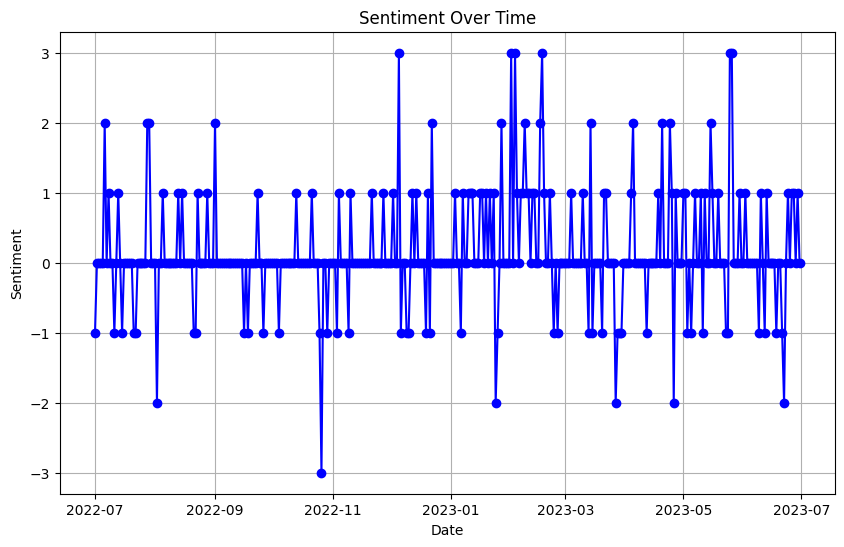

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(microsoft_daily_sentiment.index, microsoft_daily_sentiment.values, marker='o', linestyle='-', color='b')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()

In [ ]:
ms_file_path2 = '/content/Microsoft_stockvalues_data.csv'
ms_price = pd.read_csv(ms_file_path2)  # Use pd.read_csv for CSV files

# Convert the 'Date' column to datetime if it's not already
ms_price['Date'] = pd.to_datetime(ms_price['Date'])

# Sort the DataFrame based on the 'Date' column
ms_price = ms_price.sort_values(by='Date')

# Calculate returns
ms_price['Return'] = ms_price['Close'].pct_change()

# Set 'Date' column as index and 'Return' column as values
ms_price.set_index('Date', inplace=True)
returns = ms_price['Return']

print(returns.head())

Date
2022-07-01 00:00:00-04:00         NaN
2022-07-05 00:00:00-04:00    0.012597
2022-07-06 00:00:00-04:00    0.012783
2022-07-07 00:00:00-04:00    0.008227
2022-07-08 00:00:00-04:00   -0.002757
Name: Return, dtype: float64


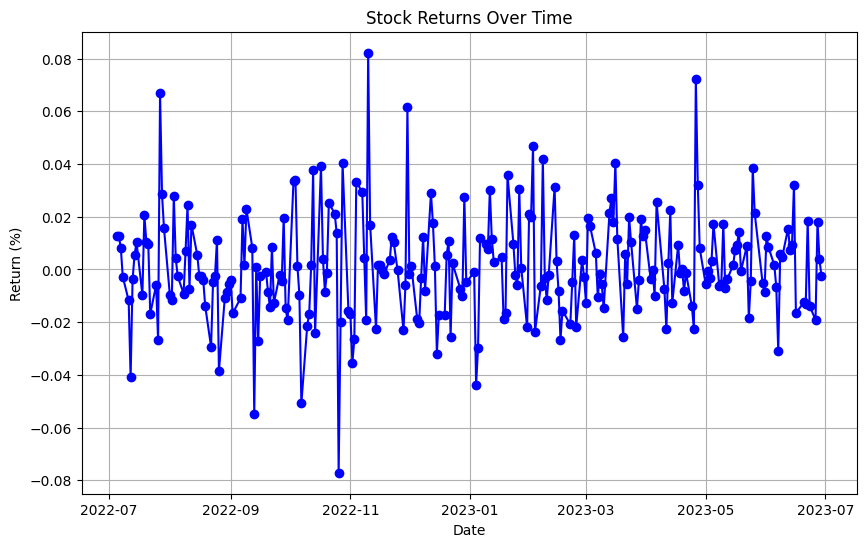

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns.values, marker='o', linestyle='-', color='b')
plt.title('Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

In [ ]:
print(microsoft_daily_sentiment)

Date
2022-07-01 00:00:00+00:00   -1
2022-07-02 00:00:00+00:00    0
2022-07-03 00:00:00+00:00    0
2022-07-04 00:00:00+00:00    0
2022-07-05 00:00:00+00:00    0
                            ..
2023-06-26 00:00:00+00:00    1
2023-06-27 00:00:00+00:00    1
2023-06-28 00:00:00+00:00    0
2023-06-29 00:00:00+00:00    1
2023-06-30 00:00:00+00:00    0
Freq: D, Name: sentiment, Length: 365, dtype: int64


In [ ]:
microsoft_daily_sentiment.index.tz

<UTC>

In [ ]:
microsoft_daily_sentiment.index=microsoft_daily_sentiment.index.date

In [ ]:
print(microsoft_daily_sentiment)

2022-07-01   -1
2022-07-02    0
2022-07-03    0
2022-07-04    0
2022-07-05    0
             ..
2023-06-26    1
2023-06-27    1
2023-06-28    0
2023-06-29    1
2023-06-30    0
Name: sentiment, Length: 365, dtype: int64


In [ ]:
# Assuming your DataFrame is named 'returns'
returns.index = pd.to_datetime(returns.index, utc=True).tz_convert('UTC')
print(returns)

Date
2022-07-01 04:00:00+00:00         NaN
2022-07-05 04:00:00+00:00    0.012597
2022-07-06 04:00:00+00:00    0.012783
2022-07-07 04:00:00+00:00    0.008227
2022-07-08 04:00:00+00:00   -0.002757
                               ...   
2023-06-23 04:00:00+00:00   -0.013806
2023-06-26 04:00:00+00:00   -0.019163
2023-06-27 04:00:00+00:00    0.018168
2023-06-28 04:00:00+00:00    0.003826
2023-06-29 04:00:00+00:00   -0.002382
Name: Return, Length: 250, dtype: float64


In [ ]:
returns.index.tz

<UTC>

In [ ]:
returns.index = returns.index.date

In [ ]:
print(returns)

2022-07-01         NaN
2022-07-05    0.012597
2022-07-06    0.012783
2022-07-07    0.008227
2022-07-08   -0.002757
                ...   
2023-06-23   -0.013806
2023-06-26   -0.019163
2023-06-27    0.018168
2023-06-28    0.003826
2023-06-29   -0.002382
Name: Return, Length: 250, dtype: float64


In [ ]:
microsoft_daily_sentiment2 = microsoft_daily_sentiment
returns2 = returns

In [ ]:
# Inner merge on the index (date)
merged_data = pd.merge(returns, microsoft_daily_sentiment, left_index=True, right_index=True, how='inner')
print(merged_data)

              Return  sentiment
2022-07-01       NaN         -1
2022-07-05  0.012597          0
2022-07-06  0.012783          2
2022-07-07  0.008227          0
2022-07-08 -0.002757          1
...              ...        ...
2023-06-23 -0.013806          0
2023-06-26 -0.019163          1
2023-06-27  0.018168          1
2023-06-28  0.003826          0
2023-06-29 -0.002382          1

[250 rows x 2 columns]


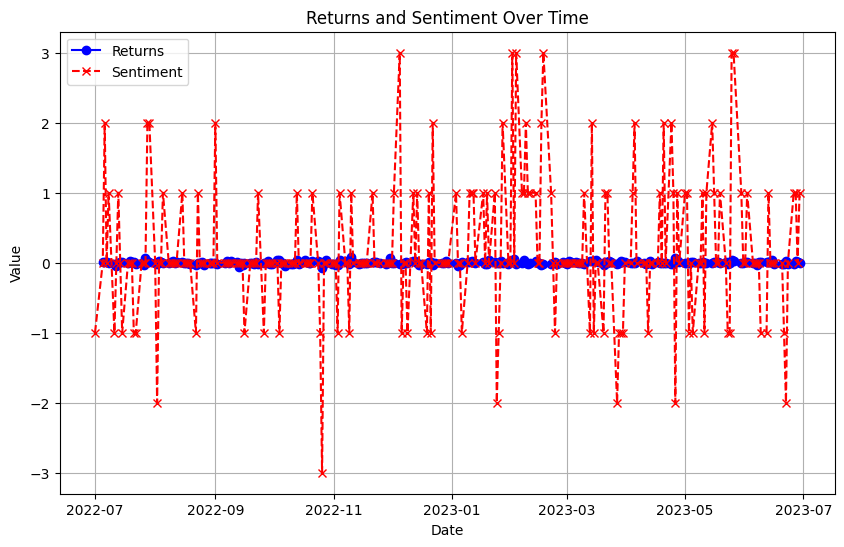

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Returns
plt.plot(merged_data.index, merged_data['Return'], marker='o', linestyle='-', color='b', label='Returns')

# Plotting Sentiment Scores
plt.plot(merged_data.index, merged_data['sentiment'], marker='x', linestyle='--', color='r', label='Sentiment')

plt.title('Returns and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

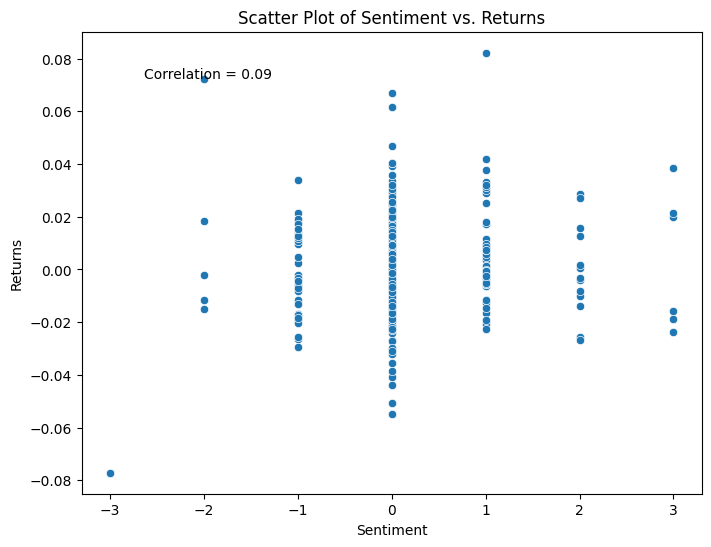

In [ ]:
import seaborn as sns

# Calculate the Pearson correlation coefficient
correlation = merged_data['Return'].corr(merged_data['sentiment'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='sentiment', y='Return')
plt.title('Scatter Plot of Sentiment vs. Returns')
plt.xlabel('Sentiment')
plt.ylabel('Returns')

# Display the Pearson correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation = {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()